In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv(r"C:\Users\19366\Downloads\output.csv");
df.shape

df = df.dropna();
df.head()

,Unnamed: 0.1,Unnamed: 0,title,text,label,num_words
0,0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,comment expected barack obama members fyf fuky...,1,871
1,2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,", demonstrators gathered last night exercising...",1,34
2,3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",dozen politically active pastors came private ...,0,1321
3,4,4,SATAN 2: Russia unvelis an image of its terrif...,"rs sarmat missile , dubbed satan , replace ss ...",1,329
4,5,5,About Time! Christian Group Sues Amazon and SP...,say one time someone sued southern poverty law...,1,244


Text(0.5, 1.0, 'Distribution of Fake - 0 /Real - 1 News')

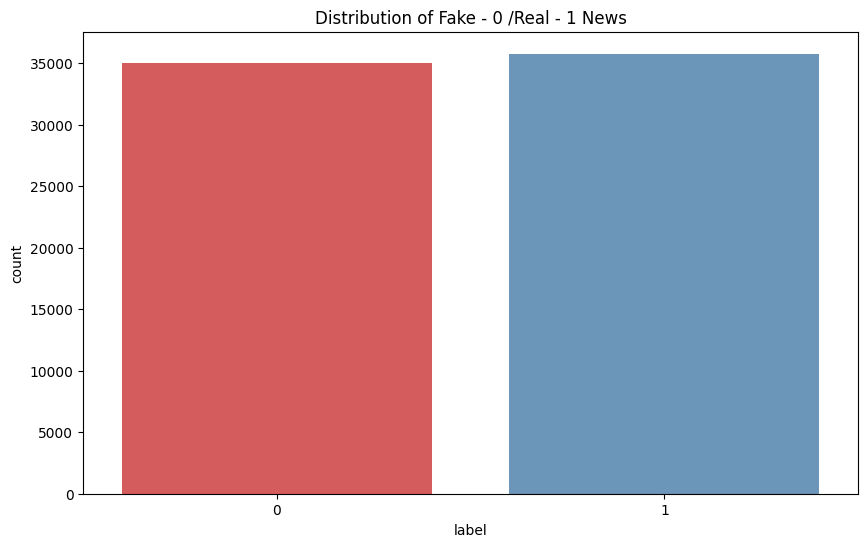

In [3]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize = (10,6))
sns.countplot(x = df['label'], palette = 'Set1', alpha = 0.8)
plt.title('Distribution of Fake - 0 /Real - 1 News')

In [4]:
import re
import string
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

nltk.download('stopwords')

def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove non-text data
    text = re.sub(r'\S*@\S*\s?', '', text)  # remove email addresses
    text = re.sub(r'http\S+', '', text)    # remove URLs
    text = re.sub(r'\d+', '', text)        # remove numbers

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s\$\%\&\*\@\-\+\=\[\]\{\}\:\;\|\\\\\<\>\?\!\#\~\(\)\.\,\^\/\´\`\¨\ª\º\€\$\£\¥\¢\₹]', '', text)
    text = re.sub(r'_', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [w for w in words if not w in stop_words]
    text = ' '.join(words)

    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\19366\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df["text"] = df["text"].apply(clean_text)

In [8]:
# Import necessary libraries
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [9]:




# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=10)





In [12]:
from sklearn.model_selection import KFold

In [14]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
acc_scores = []
loss_scores = []


In [15]:
for train_index, test_index in kf.split(df):
    # Split data into training and testing sets
    x_train, x_test = df.iloc[train_index]['text'], df.iloc[test_index]['text']
    y_train, y_test = df.iloc[train_index]['label'], df.iloc[test_index]['label']

    # Tokenize text data
    tokenizer = Tokenizer(num_words=7000)
    tokenizer.fit_on_texts(x_train)
    x_train = tokenizer.texts_to_sequences(x_train)
    x_test = tokenizer.texts_to_sequences(x_test)

    # Pad sequences
    maxlen = 500
    x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
    x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

    # Create the model
    model = create_model()

    # Train the model
    model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1,validation_split=0.1)

    # Evaluate the model
    loss, acc = model.evaluate(x_test, y_test, verbose=1)
    print(f'Evaluate Accuracy: {acc}, Loss: {loss}')

    # Append evaluation metrics to list
    acc_scores.append(acc)
    loss_scores.append(loss)
    #conf_mat = confusion_matrix(y_test, y_pred)
    #print(f'preddicted Accuracy: {preacc}')
    #print(f'Confusion Matrix:\n{conf_mat}\n')

# Calculate and print average evaluation metrics
avg_acc = sum(acc_scores)/len(acc_scores)
avg_loss = sum(loss_scores)/len(loss_scores)
print(f'Average accuracy: {avg_acc}, Average loss: {avg_loss}')

NameError: name 'create_model' is not defined

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Embedding,Dropout
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras import activations

In [17]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

import tensorflow as tf

import keras

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
from keras.layers import GRU, Input, Dense, Activation, RepeatVector, Bidirectional, LSTM, Dropout, Embedding
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split 
from keras.losses import sparse_categorical_crossentropy
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import collections

from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
#define the model
model = tf.keras.Sequential([
    Input(name='inputs',shape=[maxlen]),
    Embedding(len(tok.word_index), 128),
    Dropout(0.5),
    Bidirectional(tf.keras.layers.LSTM(256,  return_sequences=True)),
    Dropout(0.5),
    Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True)),
    Dropout(0.5),
    Bidirectional(tf.keras.layers.LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])



NameError: name 'tok' is not defined

In [18]:
#compile model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

#model summary
model.summary()

NameError: name 'model' is not defined

In [71]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [14]:
history = model.fit(x_train, y_train, epochs=20,
                    validation_split = 0.2, batch_size = 64, callbacks=[EarlyStopping(monitor='val_accuracy',mode='max', patience=3, verbose=False,restore_best_weights=True)])

Epoch 1/20
708/708 [==============================] - 205s 276ms/step - loss: 0.3311 - accuracy: 0.8506 - val_loss: 0.1616 - val_accuracy: 0.9451
Epoch 2/20
708/708 [==============================] - 194s 274ms/step - loss: 0.1175 - accuracy: 0.9610 - val_loss: 0.1026 - val_accuracy: 0.9605
Epoch 3/20
708/708 [==============================] - 189s 267ms/step - loss: 0.0613 - accuracy: 0.9808 - val_loss: 0.1068 - val_accuracy: 0.9683
Epoch 4/20
708/708 [==============================] - 192s 272ms/step - loss: 0.0401 - accuracy: 0.9876 - val_loss: 0.1136 - val_accuracy: 0.9646
Epoch 5/20
708/708 [==============================] - 194s 275ms/step - loss: 0.0234 - accuracy: 0.9936 - val_loss: 0.1154 - val_accuracy: 0.9656
Epoch 6/20
708/708 [==============================] - 192s 271ms/step - loss: 0.0181 - accuracy: 0.9948 - val_loss: 0.1385 - val_accuracy: 0.9687
Epoch 7/20
708/708 [==============================] - 189s 267ms/step - loss: 0.0170 - accuracy: 0.9950 - val_loss: 0.1306 -

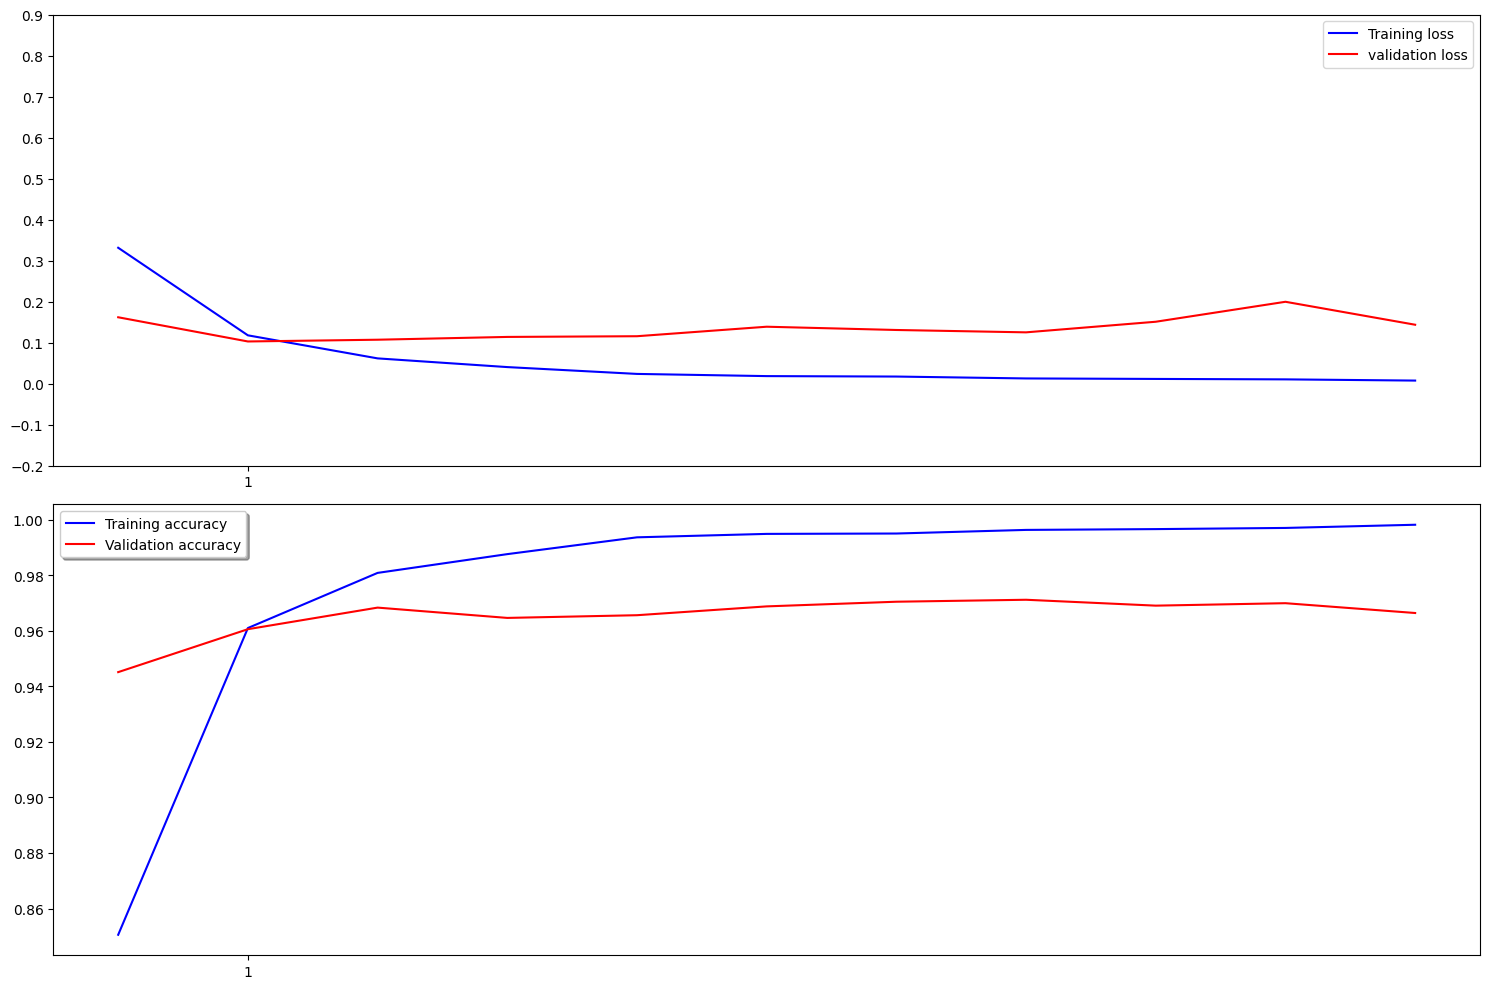

In [15]:
epochs=11

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 10))
ax1.set_yticks(np.arange(-0.2, 1, 0.1))
ax1.legend()

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 10))
ax2.legend()

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [16]:
model.save_weights('E:\Semester 3\Soft\model_Bi_LSTM_2_weights_Full_Final.h5')
model.save('E:\Semester 3\Soft\model_Bi_LSTM_2_architecture_Full_Final.h5')


In [23]:
from tensorflow.keras.models import load_model

model_path = r'E:\Semester 3\Soft\model_Bi_LSTM_2_architecture_Final.h5'
loaded_model = load_model(model_path)

# Now you can use the loaded_model to make predictions or further train the model


In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
y_hat = model.predict(x_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

443/443 [==============================] - 39s 85ms/step
Test Loss: 0.11898034811019897
Test Accuracy: 0.9716081619262695


In [44]:
print(y_hat)

[[9.9678600e-01]
 [5.0872801e-05]
 [1.2011895e-04]
 ...
 [9.8143148e-01]
 [9.9989629e-01]
 [9.9993300e-01]]


In [36]:
y_pred_classes = np.where(y_hat >= 0.5, 1, 0)

In [43]:
print(y_pred_classes)

[[1]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Calculate accuracy score and confusion matrix
acc_score = accuracy_score(y_test, y_pred_classes)
cm = confusion_matrix(y_test, y_pred_classes)

print('Accuracy Score: ', acc_score)
print('Confusion Matrix: \n', cm)

Accuracy Score:  0.9716081644183912
Confusion Matrix: 
 [[6797  234]
 [ 168 6960]]


In [46]:
# print classification report
print(classification_report(y_test, np.where(y_hat >= 0.5, 1, 0)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7031
           1       0.97      0.98      0.97      7128

    accuracy                           0.97     14159
   macro avg       0.97      0.97      0.97     14159
weighted avg       0.97      0.97      0.97     14159



Text(70.72222222222221, 0.5, 'Real Labels')

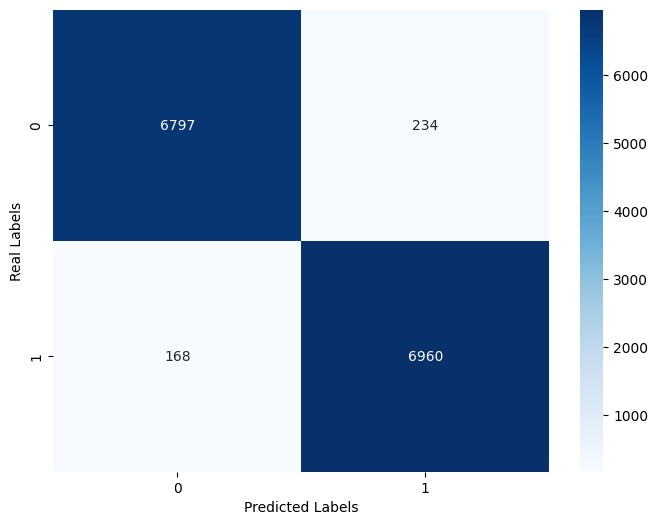

In [47]:
#plot the confusion matrix
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [45]:
# Define list of news articles to predict
news_articles = [
    "Demonstrators gathered last night exercising constitutional protected right peaceful protest order raise issues create change."
    
]
tok = Tokenizer()
# Loop over news articles and make predictions
for article in news_articles:
    # Preprocess news article
    processed_data=clean_text(article)
    x_test_processed_article = tok.texts_to_sequences([processed_data])
    x_test_processed_article_pad = pad_sequences(x_test_processed_article, padding='post', maxlen=maxlen)

    # Use trained model to predict whether news article is fake or real
    prediction = model.predict(x_test_processed_article_pad)
    y_pred_one = np.where(prediction >= 0.5, 1, 0)

    # Print prediction for current news article
    if y_pred_one == 0:
        print(f"The news article '{article}' is fake.")
    else:
        print(f"The news article '{article}' is real.")


1/1 [==============================] - 0s 170ms/step
The news article 'Demonstrators gathered last night exercising constitutional protected right peaceful protest order raise issues create change.' is real.


In [60]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Example news article
news_article = "MEXICO CITY (Reuters) - Donald Trumpâ€™s combative style has buffeted Mexicoâ€™s president for months, but deeply unpopular Enrique Pena Nieto may end up thanking the new U.S. president for prompting offended Mexicans to rally behind their leader.  From billionaire business magnate Carlos Slim to political opponents, there has been a groundswell of support for Pena Nieto, who has cut a lonely figure in months of bruising encounters with Trump. Often referred to by his initials EPN, Pena Nieto is laboring under the worst approval ratings of any Mexican president in decades due to discontent over corruption, gang violence, sluggish growth and a jump in fuel prices.     Trumpâ€™s threats to scrap the NAFTA trade deal with Mexico and build a border wall have caused anger and left Mexicans feeling fearful for the future. His challenge to Pena Nieto on Thursday - saying he should skip a planned summit between the two leaders if Mexico wasnâ€™t willing to pay for the wall - was the final straw. Pena Nieto replied a couple of hours later that he had canceled his meeting with Trump, one of the presidentâ€™s biggest ever hits on Twitter, getting more â€œlikesâ€ than when he personally broke news of the capture of notorious drug lord Joaquin â€œEl Chapoâ€ Guzman in January of last year. â€œBravo EPN!,â€ cheered former President Vicente Fox, who had initially condemned Pena Nieto for inviting Trump to Mexico for talks last August, and who has waged a colorful and expletive-ridden campaign against the Republican on Twitter. Pena Nieto and Trump talked for about an hour by phone on Friday, pledging to work out their differences and agreeing not to speak about the wall in public for now. Meanwhile, calls for unity grew in Mexico, led by Slim, a normally media-shy 76-year-old who gave a 90-minute news conference in support of the government on Friday. â€œThis is the most surprising example of national unity Iâ€™ve seen in my life,â€ said Slim, who spent several years in the past decade as the worldâ€™s richest man. â€œWe have to back the president of Mexico so he can defend our national interests.â€ Senior opposition leaders also urged a common front. â€œItâ€™s time to show unity and our commitment to Mexico,â€ Alejandra Barrales, head of the center-left Party of the Democratic Revolution (PRD), said on Twitter. Pena Nietoâ€™s credibility has been battered by a widespread public perception that he has failed to battle corruption and indeed even encouraged it since a conflict-of-interest row embroiled him, his wife and a top minister in late 2014. Some opposition critics fear the government will try to use Trump as a screen to distract from its failings. However, two senior officials told Reuters they hoped Pena Nieto would seize the moment to act quickly and decisively to improve his image. Expressions of dismay at Trumpâ€™s behavior towards Mexico have almost become a national pastime, and talk of boycotts against U.S. companies is gathering steam on social media. Slim, when asked about boycotting at his news conference, said it wasnâ€™t a good idea to turn on U.S. companies, which are creating jobs in Mexico. Some foreign companies voiced support for Mexico too. â€œI feel Mexico is being subjected to terror at the moment,â€ said Andreas Schindler, co-owner of German fruit wholesaler Don Limonâ€™s parent Pilz Schindler, by phone from Hamburg. â€œWeâ€™re right behind Mexico.â€ "
tok = Tokenizer()
# Preprocess news article (assuming you have already preprocessed the training data in the same way)
processed_article = clean_text(news_article)
x_test_processed_article = tok.texts_to_sequences([processed_article]) # Pass a list containing the processed article
x_test_processed_article_pad = pad_sequences(x_test_processed_article, padding='post', maxlen=maxlen)

# Use trained model to predict whether news article is fake or real
prediction = model.predict(x_test_processed_article_pad)
y_pred_one = np.where(prediction <= 0, 1, 0)

print(y_pred_one)
# Print prediction
if y_pred_one == 0:
    print("The news article is fake.")
else:
    print("The news article is real.")

1/1 [==============================] - 0s 191ms/step
[[0]]
The news article is fake.


In [61]:
pip install bnltk


  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Rolling back uninstall of protobuf
  Moving to c:\users\19366\anaconda3\envs\tf\lib\site-packages\protobuf-3.20.3-py3.9.egg-info
   from C:\Users\19366\anaconda3\envs\tf\Lib\site-packages\~rotobuf-3.20.3-py3.9.egg-info


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\19366\\anaconda3\\envs\\tf\\Lib\\site-packages\\google\\protobuf\\internal\\_api_implementation.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

